<a href="https://colab.research.google.com/github/Kei-Kobayash/practice_machine_learning/blob/main/ml_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Boston.csv")
df.head()

# Dummy variable

In [4]:
df["CRIME"].value_counts()

very_low    50
high        25
low         25
Name: CRIME, dtype: int64

In [6]:
crime = pd.get_dummies(df["CRIME"], drop_first = True)
df2 = pd.concat([df, crime], axis = 1)
df2 = df2.drop(["CRIME"], axis = 1)
df2.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [7]:
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

In [8]:
train_val.isnull().sum()

ZN          0
INDUS       0
CHAS        0
NOX         1
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

In [9]:
train_val2 = train_val.fillna(train_val.mean())

In [10]:
train_val2.isnull().sum()

ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

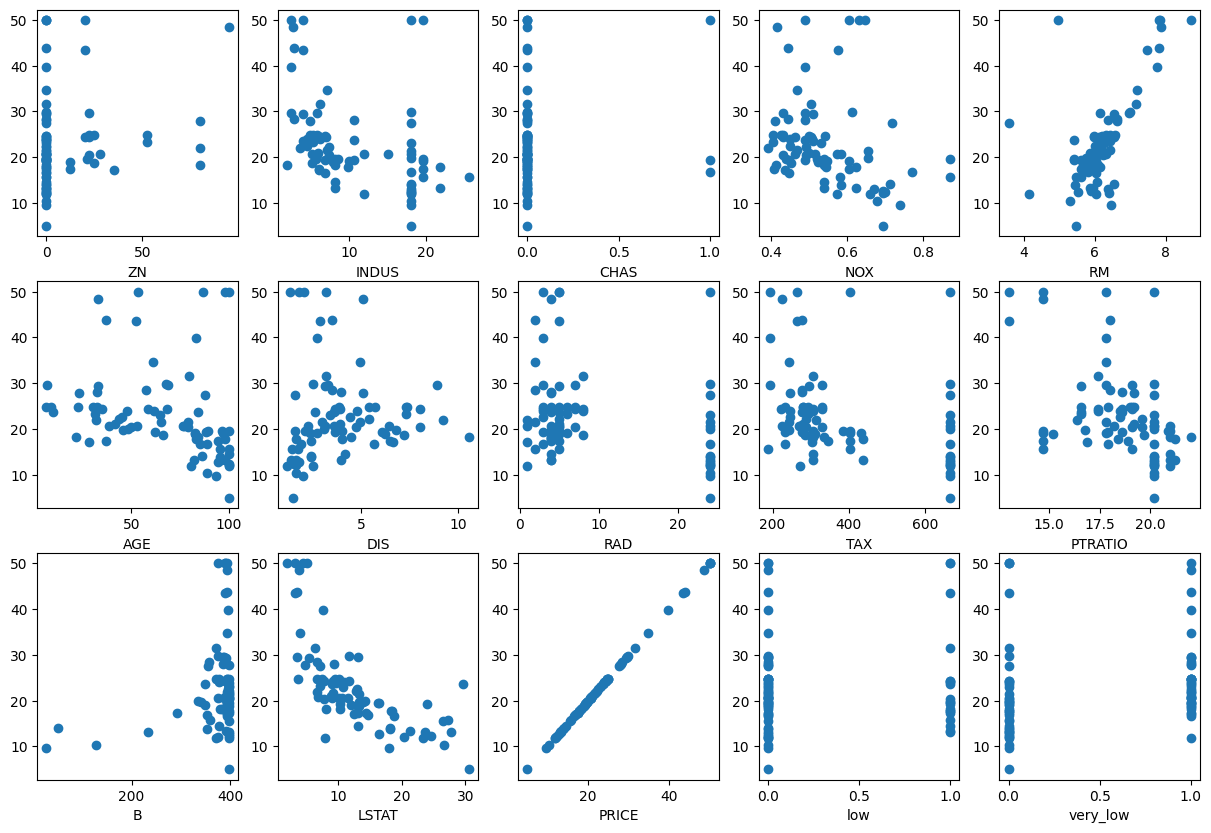

In [29]:
colnames = train_val2.columns

num_cols = 5

fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize= (15, 10))

for i, colname in enumerate(colnames):
   row = i // num_cols  # Calculate row index
   col = i % num_cols
   ax[row, col].scatter(train_val2[colname], train_val2["PRICE"])
   ax[row, col].set_xlabel(colname)

### INDUS, NOX, RM, PTRATIO, LSTAT seem to relate to PRICE

In [30]:
out_line1 = train_val2[(train_val2["RM"] < 6) & (train_val2["PRICE"] > 40)].index

out_line2 = train_val2[(train_val2["PTRATIO"] > 18) & (train_val2["PRICE"] > 40)].index

print(out_line1, out_line2)

Int64Index([76], dtype='int64') Int64Index([76], dtype='int64')


In [31]:
train_val3 = train_val2.drop([76], axis =0)

In [39]:
cols = ["INDUS", "NOX", "RM", "PTRATIO", "LSTAT", "PRICE"]
train_val4 = train_val3[cols]

train_val4.head()

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
43,5.86,0.431,6.108,19.1,9.16,24.3
62,5.86,0.431,6.957,19.1,3.53,29.6
3,21.89,0.624,6.151,21.2,18.46,17.8
71,3.64,0.392,6.108,16.4,6.57,21.9
45,5.64,0.439,5.963,16.8,13.45,19.7


In [37]:
train_cor = train_val4.corr()["PRICE"]
abs_cor = train_cor.map(abs)

In [38]:
abs_cor.sort_values(ascending = False)

PRICE      1.000000
RM         0.753771
LSTAT      0.693490
PTRATIO    0.542449
INDUS      0.470889
NOX        0.325289
Name: PRICE, dtype: float64

# Split the data

In [47]:
features = ["RM", "LSTAT", "PTRATIO"]

x = train_val4[features]
t = train_val4[["PRICE"]]

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

# Standadization

In [48]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

sc_x = sc_model_x.transform(x_train)
sc_x

array([[-0.10238334, -0.89546338, -0.97250163],
       [-0.11741281, -0.37386886,  1.21732721],
       [-0.92274224,  2.49984836,  0.83648742],
       [ 1.60346221, -1.37747891, -2.59107078],
       [-0.21134704, -0.36821472, -0.30603198],
       [ 0.28337322, -0.54632017, -0.87729168],
       [ 2.01927772, -1.55275729, -1.7817862 ],
       [-0.42551707, -0.58448562,  0.36043767],
       [-0.39420567,  0.21557535, -1.7817862 ],
       [-0.21886178, -0.00634969,  0.02720284],
       [-0.48438252,  0.24525959,  0.83648742],
       [ 0.02411475,  0.04453758,  0.83648742],
       [ 0.31092726, -1.31669689,  0.31283269],
       [ 2.08315299, -1.28559912, -1.7817862 ],
       [-0.98411261,  1.56550154,  0.07480782],
       [-0.28398951,  0.07704889, -0.78208173],
       [-0.9039554 ,  1.91040415, -1.7817862 ],
       [ 0.23828479,  1.52450902,  0.83648742],
       [-0.12993738, -0.28622968, -0.49645188],
       [-0.18629791, -0.73573389,  0.55085757],
       [-0.37917619,  0.48697412,  0.836

In [49]:
temp_df = pd.DataFrame(sc_x, columns = x_train.columns)
temp_df.mean()

RM        -3.418782e-16
LSTAT      1.445052e-16
PTRATIO   -1.436241e-16
dtype: float64

In [50]:
temp_df.std()

RM         1.008032
LSTAT      1.008032
PTRATIO    1.008032
dtype: float64

In [54]:
sc_model_t = StandardScaler()
sc_model_t.fit(t_train)

sc_t = sc_model_t.transform(t_train)

In [57]:
sc_x_val = sc_model_x.transform(x_val)
sc_t_val = sc_model_t.transform(t_val)

# Modelling

In [58]:
model = LinearRegression()
model.fit(sc_x, sc_t)
model.score(sc_x_val, sc_t_val)

0.7359028880291

# Create Learn function

1.   input
2.   output



In [75]:
def learn(x, t):
  x_train, x_val, t_train, t_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

  # Standardization
  sc_model_x = StandardScaler()
  sc_model_t = StandardScaler()

  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)

  sc_model_t.fit(t_train)
  sc_t_train = sc_model_t.transform(t_train)

  model = LinearRegression()
  model.fit(sc_x_train, sc_t_train)

  sc_x_val= sc_model_x.transform(x_val)
  sc_t_val= sc_model_t.transform(t_val)

  train_score = model.score(sc_x_train, sc_t_train)
  val_score = model.score(sc_x_val, sc_t_val)

  return train_score, val_score

In [76]:
x = train_val3.loc[ :, ["RM", "LSTAT", "PTRATIO"]]
t = train_val3[["PRICE"]]

s1, s2 = learn(x, t)
print(s1, s2)

0.717589757251598 0.7359028880291


In [71]:
t.shape

(79, 1)

# Feature engineering (manipulation)

In [77]:
x["RM2"] = x["RM"]**2

s1, s2 = learn(x, t)
print(s1, s2)

0.8456207631185566 0.8372526287986779


In [80]:
x["LSTAT2"] = x["LSTAT"]**2
x["PTRATIO2"] = x["PTRATIO"]**2

In [81]:
x["RM*LSTAT"] = x["RM"] * x["LSTAT"]
x.head(2)

,RM,LSTAT,PTRATIO,RM2,RM*LSTAT,LSTAT2,PTRATIO2
43,6.108,9.16,19.1,37.307664,55.94928,83.9056,364.81
62,6.957,3.53,19.1,48.399849,24.55821,12.4609,364.81


In [82]:
s1, s2 = learn(x, t)
print(s1, s2)

0.8668534967796697 0.8739347357775971


# relearn

In [84]:
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_t2 = StandardScaler()
sc_model_t2.fit(t)
sc_t = sc_model_t2.transform(t)

model = LinearRegression()
model.fit(sc_x, sc_t)

LinearRegression()

In [90]:
test2 = test.fillna(train_val.mean())
x_test = test2.loc[:, ["RM", "LSTAT", "PTRATIO"]]
t_test = test2[["PRICE"]]

x_test["RM2"] = x_test["RM"]**2
x_test["RM*LSTAT"] = x_test["RM"] * x_test["LSTAT"]
x_test["LSTAT2"] = x_test["LSTAT"]**2
x_test["PTRATIO2"] = x_test["PTRATIO"]**2

sc_x_test = sc_model_x2.transform(x_test)
sc_t_test = sc_model_t2.transform(t_test)

model.score(sc_x_test, sc_t_test)

0.7649249353669056

note: the order of the features should be the same as that of the data used in training.